In [2]:
#importing the required libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
#Reading Miles_Traveled Data
miles_trl=pd.read_csv(r"C:\Users\sajal\OneDrive\Desktop\cyberbite\Miles_Traveled.csv")

In [8]:
miles_trl

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


In [9]:
miles_trl.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [10]:
miles_trl.tail()

,DATE,TRFVOLUSM227NFWA
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [6]:
#Data Cleaning and Preprocessing

In [12]:
#checking for null values
miles_trl.isnull().sum()

DATE                0
TRFVOLUSM227NFWA    0
dtype: int64

In [13]:
#checking for duplicate values
miles_trl.duplicated().sum()

0

In [14]:
miles_trl.describe()

,TRFVOLUSM227NFWA
count,588.000000
mean,190420.380952
std,57795.538934
min,77442.000000
25%,133579.000000
50%,196797.500000
75%,243211.500000
max,288145.000000


In [15]:
miles_trl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [18]:
# Reading Alcohol_Sales Data
alc_sales=pd.read_csv(r"C:\Users\sajal\OneDrive\Desktop\cyberbite\Alcohol_Sales.csv")

In [19]:
alc_sales

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [20]:
alc_sales.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [21]:
alc_sales.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [15]:
#Cleaning and Preprocessing

In [22]:
alc_sales.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [23]:
alc_sales.duplicated().sum()

0

In [24]:
alc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [25]:
alc_sales.describe()

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [20]:
#EXPLORATORY DATA ANALYSIS

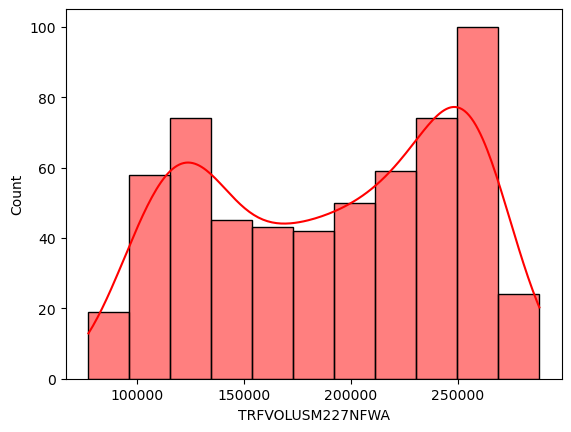

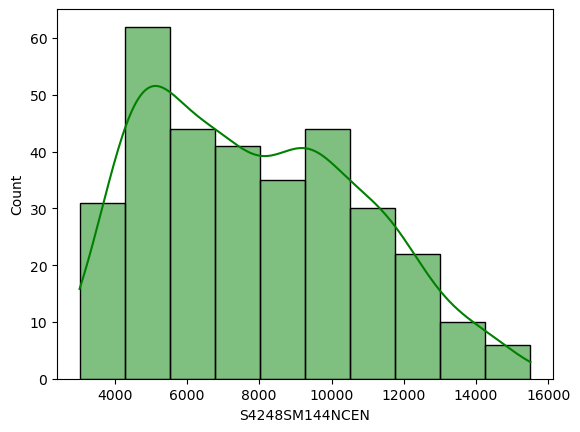

In [29]:
#univariate analysis
#plotting histogram to show the density of variables of both datasets 
sns.histplot(data=miles_trl,x='TRFVOLUSM227NFWA',kde=True,color='red')
plt.show()

sns.histplot(data=alc_sales,x='S4248SM144NCEN',kde=True,color='green')
plt.show()


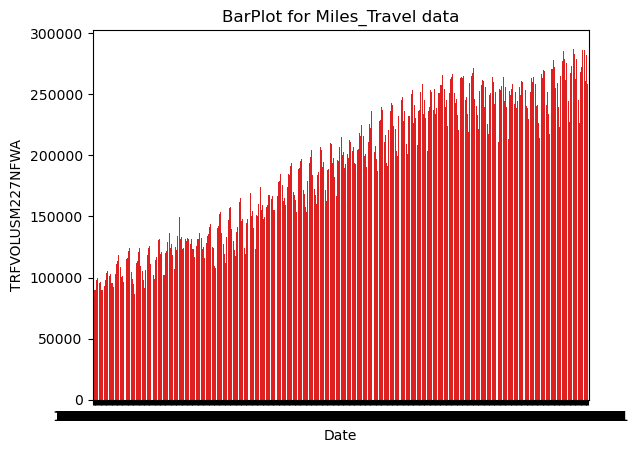

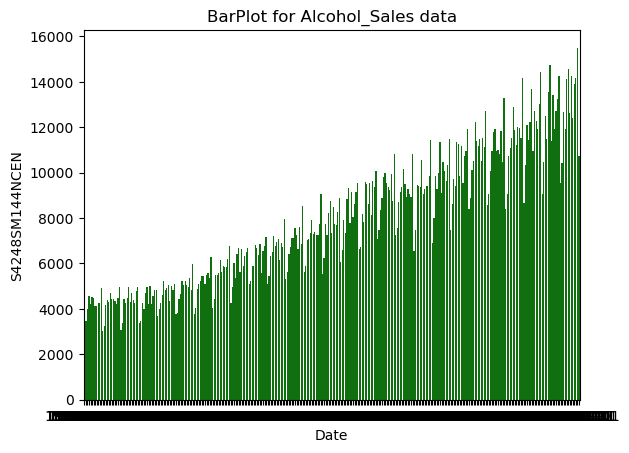

In [31]:
#bivariate analysis
#barplot of both datasets so as to get the relevant info.

sns.barplot(data=miles_trl,x='DATE', y='TRFVOLUSM227NFWA', color='red' )
plt.xlabel('Date')
plt.ylabel('TRFVOLUSM227NFWA')
plt.title('BarPlot for Miles_Travel data')
plt.show()


sns.barplot(data=alc_sales,x='DATE', y='S4248SM144NCEN', color='green' )
plt.xlabel('Date')
plt.ylabel('S4248SM144NCEN')
plt.title('BarPlot for Alcohol_Sales data')
plt.show()


In [32]:
#LabelEncoding -handling categorical variables by converting them into numerical format

#creating an instance of LabelEncoder 
le=LabelEncoder()

In [34]:
miles_trl['DATE']=le.fit_transform(miles_trl['DATE'])

alc_sales['DATE']=le.fit_transform(alc_sales['DATE'])

In [25]:
#Creating correlation Matrix - to quantify the degree of linear relationship between pairs of variables.

In [35]:
corr_matrix1=alc_sales.corr()
corr_matrix1

,DATE,S4248SM144NCEN
DATE,1.000000,0.939371
S4248SM144NCEN,0.939371,1.000000


In [39]:
corr_matrix2=miles_trl.corr()
corr_matrix2

,DATE,TRFVOLUSM227NFWA
DATE,1.000000,0.958102
TRFVOLUSM227NFWA,0.958102,1.000000


In [38]:
#Plotting Correlation Matrix Heatmap - visualizing relationships

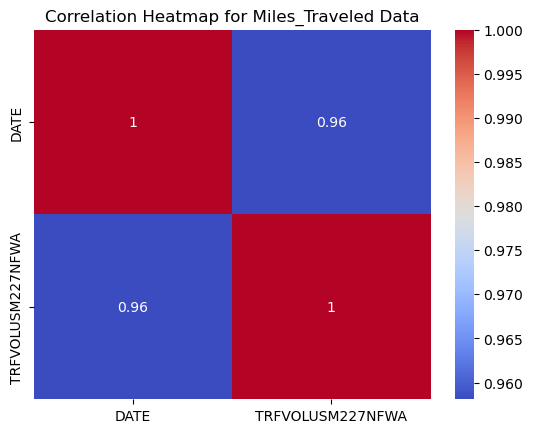

In [40]:
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap for Miles_Traveled Data")
plt.show()

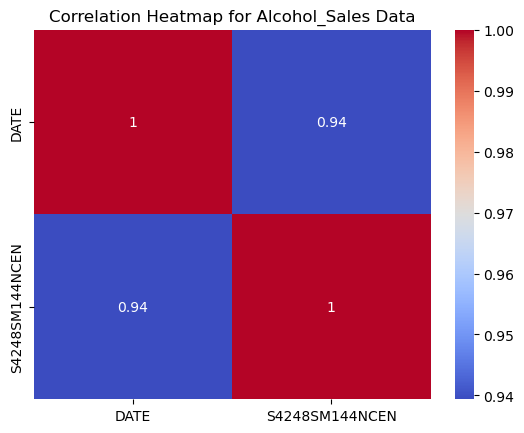

In [29]:
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap for Alcohol_Sales Data")
plt.show()

In [41]:
#checking for stationarity : using Augmented Dickey-Fuller (ADF) test

#creating function for adf test
def adf_test(dataset):
    dftest=adfuller(dataset, autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. p-value: ",dftest[1])
    print("3. Num of Lags: ",dftest[2])
    print("4. Num of observations used for ADF Regression and Critical Values Calculation: ",dftest[3])
    print("5. Critical Values: ")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

1. ADF:  -1.2425483519561487
2. p-value:  0.6550300653192418
3. Num of Lags:  17
4. Num of observations used for ADF Regression and Critical Values Calculation:  570
5. Critical Values: 
	 1% :  -3.441874550188182
	 5% :  -2.8666239496633246
	 10% :  -2.569477593105571


<Axes: >

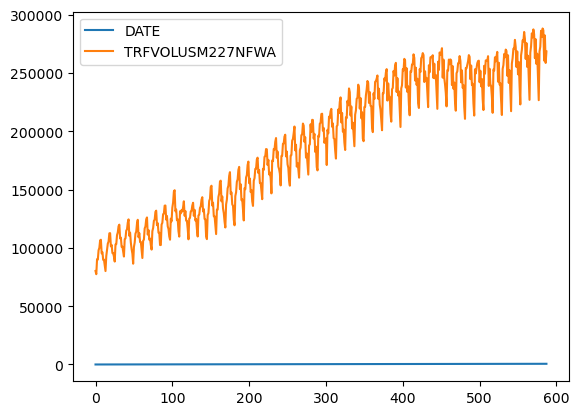

In [44]:
adf_test(miles_trl['TRFVOLUSM227NFWA'])
miles_trl.plot()

1. ADF:  2.037404725913696
2. p-value:  0.9987196267088919
3. Num of Lags:  14
4. Num of observations used for ADF Regression and Critical Values Calculation:  310
5. Critical Values: 
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


<Axes: >

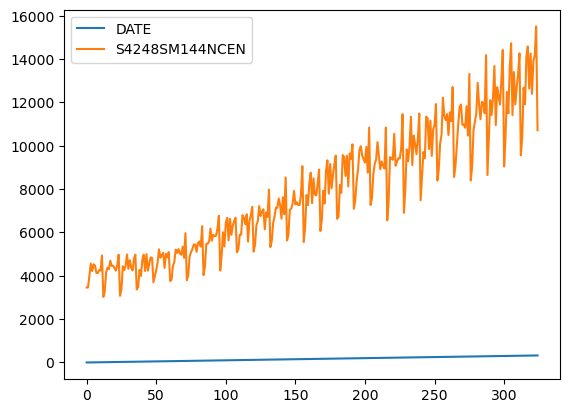

In [32]:
adf_test(alc_sales['S4248SM144NCEN'])
alc_sales.plot()

In [34]:
#MODELING
#using Miles_Traveled data for modeling 

In [46]:
#making data stationary
miles_trl['diff_1'] = miles_trl['TRFVOLUSM227NFWA'].diff(periods=1).dropna()
miles_trl=miles_trl.dropna()
#now checking for stationarity
adf_test(miles_trl['diff_1'])

1. ADF:  -4.893095824173459
2. p-value:  3.5969737869089804e-05
3. Num of Lags:  16
4. Num of observations used for ADF Regression and Critical Values Calculation:  570
5. Critical Values: 
	 1% :  -3.441874550188182
	 5% :  -2.8666239496633246
	 10% :  -2.569477593105571


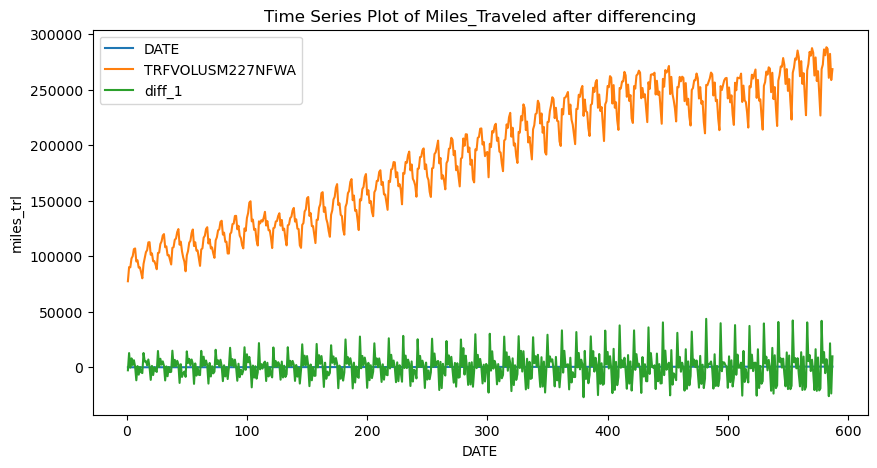

In [53]:
#plotting the data
miles_trl.plot(figsize=(10,5))
plt.title('Time Series Plot of Miles_Traveled after differencing')  
plt.xlabel('DATE')
plt.ylabel('miles_trl')
plt.show()   

In [48]:
#extracting the target series
series=miles_trl['diff_1']
series.describe()

count      587.000000
mean       320.681431
std      12693.294961
min     -26962.000000
25%      -8249.000000
50%        648.000000
75%       6316.000000
max      43603.000000
Name: diff_1, dtype: float64

In [49]:
#train test split
train_size=int(len(series)*0.8)
df_train, test =series[:train_size], series[train_size:]


In [50]:
#fit the ARIMA model
order=1,1,1
arima_model= ARIMA(df_train, order=(1, 1, 1))
arima_result=arima_model.fit()

C:\Users\sajal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sajal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sajal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
#Forecasting
arima_forecast=arima_result.forecast(steps=len(test))

C:\Users\sajal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sajal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [52]:
#MODEL EVALUATION
arima_rmse=np.sqrt(mean_squared_error(test,arima_forecast))
arima_mse=mean_absolute_error(test,arima_forecast)
print("ARIMA root_mean_squared_error is :",arima_rmse)
print("ARIMA mean_absolute_error is :",arima_mse)

ARIMA root_mean_squared_error is : 16647.1204566518
ARIMA mean_absolute_error is : 12811.79218821821
